I will try several stack Layers and compare these accuracies.

# Prepare for Environment

In [1]:
!pip install matplotlib --upgrade
!pip install quandl --upgrade
!pip install yahoo_finance --upgrade

#generic
%matplotlib inline
from __future__ import print_function

import numpy as np
import time
import quandl 
import matplotlib.pyplot as plt

from yahoo_finance import Share



def get_data_by_key(key, data):
    data_it = iter(data)
    return_data = []
    flag = True
    for d in data_it:
        return_data.append(d[key])
        
    return np.array(return_data)

def get_data_by_list(name_list, start_date, end_date, data_type="Open"):
    share_list = []
    for name in name_list:
        share_list.append(Share(name))
    
    stock_data_list = []
    date = []
    flag = True
    N_data = 0
    fail_name_list = []
    for idx, share in enumerate(share_list):
        name = name_list[idx]
        hist_data = share.get_historical(start_date=start_date, end_date=end_date)
        stock_data = map(float, get_data_by_key(key=data_type, data=hist_data))
        date.append(get_data_by_key(key='Date', data=hist_data))
        stock_data_list.append(stock_data)
        N_data = len(stock_data)
        if N_data == 0:
            fail_name_list.append(name)
    print ("fail_name_list: ", fail_name_list)
    return np.array(stock_data_list).T, date

Requirement already up-to-date: matplotlib in /usr/local/lib/python2.7/dist-packages
Requirement already up-to-date: numpy>=1.6 in /usr/local/lib/python2.7/dist-packages (from matplotlib)
Requirement already up-to-date: python-dateutil in /usr/local/lib/python2.7/dist-packages (from matplotlib)
Requirement already up-to-date: pytz in /usr/local/lib/python2.7/dist-packages (from matplotlib)
Requirement already up-to-date: cycler in /usr/local/lib/python2.7/dist-packages (from matplotlib)
Requirement already up-to-date: pyparsing!=2.0.4,>=1.5.6 in /usr/local/lib/python2.7/dist-packages (from matplotlib)
Cleaning up...
Requirement already up-to-date: quandl in /usr/local/lib/python2.7/dist-packages
Cleaning up...
Requirement already up-to-date: yahoo_finance in /usr/local/lib/python2.7/dist-packages
Requirement already up-to-date: pytz in /usr/local/lib/python2.7/dist-packages (from yahoo_finance)
Requirement already up-to-date: simplejson in /usr/local/lib/python2.7/dist-packages (from y

In [2]:
energy = ["PTR", "XOM", "CVX", "RDS-A", "BP", "TOT", "SLB", "KMI", "COP", "CEO", 
          "E", "STO", "OXY", "PBR", "EOG", "APC", "SU", "ENB", "HAL", "WMB"]
financial = ["WFC", "JPM", "HSBC", "BAC", "C", "SAN", "MTU", "RY", "WBK", "TD", "GS", 
             "LYG", "AXP", "AIG", "MS", "ITUB", "BCS", "BBVA"]
healthcare = ["NVS", "JNJ", "PFE", "MRK", "GILD", "SNY", "AMGN", "NVO", "GSK", "UNH",
             "MDT", "BMY", "CELG", "BIIB", "AZN", "LLY", "ABT", "AGN", "VRX", "TEVA",
             "TMO", "SHPG", "REGN"]
buisiness = ["ACN", "LMT", "CNI", "FDX", "DAL", "CSX", "AAL", "CP", "NSC", "NOC", "LUV"]
telecom = ["CHL", "VZ", "T", "VOD", "NTT", "AMX", "CHA", "BT", "CHU", "ORAN", "BCE",
           "CHT", "SKM", "TI", "TU", "S", "TLK", "DUK", "NGG", "D", "SO", "EXC", "KEP",
          "AEP", "SRE", "PCG", "HNP", "PPL", "PEG", "EIX", "ETP", "ED", "ENI", "XEL", "ES", "FE"]
hardware = ["AAPL", "ORCL", "IBM", "INTC", "CSCO", "TSM", "QCOM", "HPQ", "TXN", "EMC",
           "CAJ", "ASML", "ERIC", "SNE", "AVGO", "MU", "GLW", "NXPI", "NOK",
           "AMAT", "WDC", "WIT", "ADI", "STX", "APH"]
software = ["MSFT", "GOOGL", "BIDU", "EBAY", "SAP", "CRM", "YHOO", "VMW",
            "ADBE", "CTSH", "INFY", "INTU", "LNKD", "RHT", "NTES", "CHKP", 
            "CA", "ADSK", "AKAM", "NVDA"]
industrial = ["GE", "V", "MA", "UTX", "MMM", "BA", "UNP", "UPS", "HON", "DHR", "CAT", 
              "ABB", "GD", "ADP", "EMR", "ITW", "ECL", "TEL", "PCAR", "WM"]
manufacturing = ["TM", "HMC", "F", "GM", "JCI", "TSLA", "TTM", "CMI", "DLPH", "MGA",
                "CMI", "DLPH", "MGA", "GPC", "BWA", "HOG", "ALV", "HAR", "LEA", "LKQ", 
                 "WBC", "GT", "FCAU", "NSANY", "NAV"]
consumer = ["PG", "BUD", "KO", "PEP", "UL", "PM", "BTI", "MO", "ABEV", "DEO", "MDLZ",
            "CL", "MON", "MCK", "KMB", "WHR", "DIS", "CMCSA", "FOXA", "TWX", "TWC",
           "DISH", "CBS", "DISCA", "TV", "CHTR", "QVCA", "OMC", "NLSN", 
           "PSO", "SJR", "NFLX"]
diversified = ["BRK-A", "BRK-B", "UTX", "BC", "RTN", "OLN", "ITT", "MSBHY", "KWHIY", 
               "ABB", "IEP", "GE"]
retailing = ["WMT", "AMZN", "HD", "MCD", "NKE", "SBUX", "CVS", "WBA", "PCLN", "COST", 
            "TGT", "TJX", "LVS", "YUM", "CCL", "LUX", "DG", "M", "AZO", "ROST", "CMG", "GPS", 
            "DLTR", "RCL", "KSS", "HOT", "JWN"]

input_list = energy + financial + healthcare + buisiness + telecom\
+ hardware + software + industrial + manufacturing + consumer + diversified + retailing
print (len(input_list))

269


In [3]:
print ("Started!!")

st = time.time()
start_date="2014-04-01"
end_date="2016-04-01"
input_data, date = get_data_by_list(input_list, start_date=start_date, end_date=end_date) 
sp = quandl.get("YAHOO/INDEX_GSPC", start_date=start_date, end_date=end_date)
target_data = np.array(sp['Open'])
elapsed = time.time() - st
print ("time for getting training_data:", elapsed)

Started!!
fail_name_list:  []
time for getting training_data: 869.288609982


In [16]:
import chainer
from chainer import cuda, Function, gradient_check, Variable, optimizers, serializers, utils
from chainer import Link, Chain, ChainList
import chainer.functions as F
import chainer.links as L

try using StackedLSTM

In [35]:
class Stacked2LSTM(Chain):
    def __init__(self, N_in, N_middle, N_out):
        super(Stacked2LSTM, self).__init__(
            input = L.Linear(N_in, N_middle),
            mid1 = L.LSTM(N_middle, N_middle),
            mid2 = L.LSTM(N_middle, N_middle),
            output = L.Linear(N_middle, N_out),
        )
        
    def reset_state(self):
        self.mid1.reset_state()
        self.mid2.reset_state()
    
    def __call__(self, x):
        h1 = F.relu(self.input(x))
        h2 = F.relu(self.mid1(h1))
        h3 = F.relu(self.mid2(h2))
        y = self.output(h3)
        return y
    
class Regression(Chain):
    def __init__(self, predictor):
        super(Regression, self).__init__(predictor=predictor)
        
    def __call__(self, x, y):
        output = self.predictor(x)
        self.loss = F.mean_squared_error(output, y)
        return self.loss

In [18]:
from itertools import izip


def online_train(lstm, model, optimizer, x_train, y_train, 
                             N_memory=100, renew_freq=10, N_epoch=10):
    prediction_list = [y_train[0]]
    df_input = np.log(x_train[1:] / x_train[:-1])
    df_target = np.log(y_train[1:] / y_train[:-1])
    df_target = df_target.reshape(len(df_target), 1)
    if N_memory <= renew_freq:
        N_memory = renew_freq
    #N_data will be the length of term -1
    N_data = len(df_input)
    N_renew = N_data / renew_freq
    print_every = N_renew / 10
    if print_every == 0:
        print_every = 1
    begin = 0
    for i in xrange(N_renew):
        end = (i + 1) * renew_freq
        future_end = end + renew_freq
        if i == N_renew - 1:
            if end == N_data:
                continue
            else:
                future_end = N_data
                
        #fix the number of data used for learning
        if end > N_memory:
            begin  = end - N_memory
            
        if (i + 1) % print_every == 0:
            print ("predict for  [%d, %d]" % (end, future_end))
            
        x_v = Variable(np.array(df_input[begin: end], dtype=np.float32))
        y_v = Variable(np.array(df_target[begin: end], dtype=np.float32))
        #learning
        for epoch in range(N_epoch):
            lstm.reset_state()
            model.zerograds()
            loss = model(x_v, y_v)
            loss.backward()
            optimizer.update()
        # prediction   
        x_v_pred = Variable(np.array(df_input[end: future_end], dtype=np.float32)) 
        lstm.reset_state()
        pre_out = Variable(x_v_pred.data)
        output = model.predictor(pre_out)
        prediction = y_train[end] * np.cumprod(np.exp(output.data))
        prediction_list += list(prediction)
    return prediction_list

In [19]:
hist_data = Share(input_list[0]).get_historical(start_date=start_date, end_date=end_date)
date = get_data_by_key(key='Date', data=hist_data)

In [20]:
date = list(date)
date.reverse()

In [21]:
import datetime
def convert_time_format(date):
    date_tilde = date.split("-")
    date_tilde = map(int, date_tilde)
    return datetime.datetime(*date_tilde)

In [22]:
date_label=[]
for i in xrange(len(date)):
    date_label.append(convert_time_format(date[i]))

In [23]:
input_str = ""
length = 10
for i in xrange(len(input_list)):
    input_str += input_list[i] + ", "
    if (i + 1) % length == 0:
        input_str += "\n"
print (input_str)

PTR, XOM, CVX, RDS-A, BP, TOT, SLB, KMI, COP, CEO, 
E, STO, OXY, PBR, EOG, APC, SU, ENB, HAL, WMB, 
WFC, JPM, HSBC, BAC, C, SAN, MTU, RY, WBK, TD, 
GS, LYG, AXP, AIG, MS, ITUB, BCS, BBVA, NVS, JNJ, 
PFE, MRK, GILD, SNY, AMGN, NVO, GSK, UNH, MDT, BMY, 
CELG, BIIB, AZN, LLY, ABT, AGN, VRX, TEVA, TMO, SHPG, 
REGN, ACN, LMT, CNI, FDX, DAL, CSX, AAL, CP, NSC, 
NOC, LUV, CHL, VZ, T, VOD, NTT, AMX, CHA, BT, 
CHU, ORAN, BCE, CHT, SKM, TI, TU, S, TLK, DUK, 
NGG, D, SO, EXC, KEP, AEP, SRE, PCG, HNP, PPL, 
PEG, EIX, ETP, ED, ENI, XEL, ES, FE, AAPL, ORCL, 
IBM, INTC, CSCO, TSM, QCOM, HPQ, TXN, EMC, CAJ, ASML, 
ERIC, SNE, AVGO, MU, GLW, NXPI, NOK, AMAT, WDC, WIT, 
ADI, STX, APH, MSFT, GOOGL, BIDU, EBAY, SAP, CRM, YHOO, 
VMW, ADBE, CTSH, INFY, INTU, LNKD, RHT, NTES, CHKP, CA, 
ADSK, AKAM, NVDA, GE, V, MA, UTX, MMM, BA, UNP, 
UPS, HON, DHR, CAT, ABB, GD, ADP, EMR, ITW, ECL, 
TEL, PCAR, WM, TM, HMC, F, GM, JCI, TSLA, TTM, 
CMI, DLPH, MGA, CMI, DLPH, MGA, GPC, BWA, HOG, ALV, 
HAR, LEA, LKQ, WBC, GT, FC

predict for  [50, 51]
predict for  [100, 101]
predict for  [150, 151]
predict for  [200, 201]
predict for  [250, 251]
predict for  [300, 301]
predict for  [350, 351]
predict for  [400, 401]
predict for  [450, 451]
predict for  [500, 501]
time for prediction: 3849.640136


NameError: name 'x' is not defined

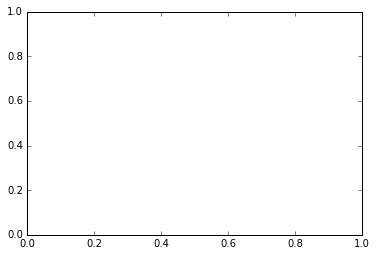

In [36]:
import time

N_in = len(input_list)
N_middle=int(0.2 * N_in)
N_out = 1
freq = 1

N_epoch = 1000
N_memory = max(2 * freq, 50)
lstm = Stacked2LSTM(N_in, N_middle, N_out)
model = Regression(lstm)
optimizer = optimizers.Adam()
optimizer.setup(model)
st = time.time()
prediction = online_train(lstm, model, optimizer, input_data, target_data, 
                             N_memory=N_memory, renew_freq=freq, N_epoch=N_epoch)  
N_pred = len(prediction)
lasped_time = time.time() - st
print ("time for prediction: %f" % lasped_time)

import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pylab import text


# データをセット
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, y)


# グラフのフォーマットの設定
days      = mdates.AutoDateLocator()  
daysFmt = mdates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_locator(days)
ax.xaxis.set_major_formatter(daysFmt)
fig.autofmt_xdate()

N_data = len(input_data)
N_freq = N_data / freq
for i in xrange(N_freq):
    ax.scatter(date[i * freq], target_data[i * freq])
ax.plot(date[-N_pred:], target_data[-N_pred:], label="raw_data", c='b')
ax.plot(date[-N_pred:], prediction, label="prediction", c='g')
plt.xlim(date[-N_pred], date[-1])
plt.ylim(1800, 2150)

# text(date[0],    1700, "symbol: %d \n" % len(input_list) +  input_str, ha = 'left', va = 'top') 

plt.legend() 

plt.savefig("S&P_1day_dot", dpi=400)

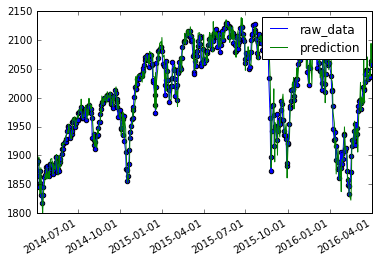

In [37]:
# データをセット
fig = plt.figure()
ax = fig.add_subplot(111)

# X軸データ
x = [datetime.datetime(2010,1,1), datetime.datetime(2010,1,2),
     datetime.datetime(2010,1,3), datetime.datetime(2010,1,4),
     datetime.datetime(2010,1,5)]

# Y軸データ
y = [1, 3, 2, 4, 1]

ax.plot(x, y)


# グラフのフォーマットの設定
days      = mdates.AutoDateLocator()  
daysFmt = mdates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_locator(days)
ax.xaxis.set_major_formatter(daysFmt)
fig.autofmt_xdate()

N_data = len(input_data)
N_freq = N_data / freq
for i in xrange(N_freq):
    ax.scatter(date[i * freq], target_data[i * freq])
ax.plot(date[-N_pred:], target_data[-N_pred:], label="raw_data", c='b')
ax.plot(date[-N_pred:], prediction, label="prediction", c='g')
plt.xlim(date[-N_pred], date[-1])
plt.ylim(1800, 2150)

# text(date[0],    1700, "symbol: %d \n" % len(input_list) +  input_str, ha = 'left', va = 'top') 

plt.legend() 

plt.savefig("S&P_1day_dot", dpi=400)

predict for  [44, 66]
predict for  [88, 110]
predict for  [132, 154]
predict for  [176, 198]
predict for  [220, 242]
predict for  [264, 286]
predict for  [308, 330]
predict for  [352, 374]
predict for  [396, 418]
predict for  [440, 462]
predict for  [484, 504]
time for prediction: 163.139131


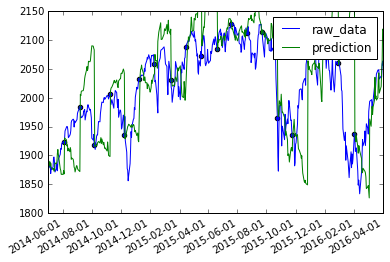

In [38]:
import time

N_in = len(input_list)
N_middle=int(0.2 * N_in)
N_out = 1
freq = 22

N_epoch = 1000
N_memory = max(2 * freq, 50)
lstm = Stacked2LSTM(N_in, N_middle, N_out)
model = Regression(lstm)
optimizer = optimizers.Adam()
optimizer.setup(model)
st = time.time()
prediction = online_train(lstm, model, optimizer, input_data, target_data, 
                             N_memory=N_memory, renew_freq=freq, N_epoch=N_epoch)  
N_pred = len(prediction)
lasped_time = time.time() - st
print ("time for prediction: %f" % lasped_time)

import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pylab import text


# データをセット
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, y)


# グラフのフォーマットの設定
days      = mdates.AutoDateLocator()  
daysFmt = mdates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_locator(days)
ax.xaxis.set_major_formatter(daysFmt)
fig.autofmt_xdate()

N_data = len(input_data)
N_freq = N_data / freq
for i in xrange(N_freq):
    ax.scatter(date[i * freq], target_data[i * freq])
ax.plot(date[-N_pred:], target_data[-N_pred:], label="raw_data", c='b')
ax.plot(date[-N_pred:], prediction, label="prediction", c='g')
plt.xlim(date[-N_pred], date[-1])
plt.ylim(1800, 2150)

# text(date[0],    1700, "symbol: %d \n" % len(input_list) +  input_str, ha = 'left', va = 'top') 

plt.legend() 

plt.savefig("S&P_1month_dot", dpi=400)

predict for  [50, 60]
predict for  [100, 110]
predict for  [150, 160]
predict for  [200, 210]
predict for  [250, 260]
predict for  [300, 310]
predict for  [350, 360]
predict for  [400, 410]
predict for  [450, 460]
predict for  [500, 504]
time for prediction: 363.426963


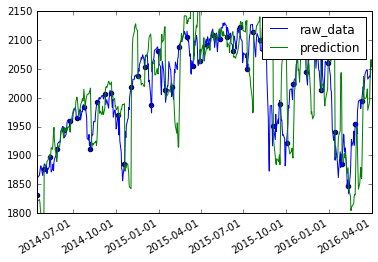

In [39]:
import time

N_in = len(input_list)
N_middle=int(0.2 * N_in)
N_out = 1
freq = 10

N_epoch = 1000
N_memory = max(2 * freq, 50)
lstm = Stacked2LSTM(N_in, N_middle, N_out)
model = Regression(lstm)
optimizer = optimizers.Adam()
optimizer.setup(model)
st = time.time()
prediction = online_train(lstm, model, optimizer, input_data, target_data, 
                             N_memory=N_memory, renew_freq=freq, N_epoch=N_epoch)  
N_pred = len(prediction)
lasped_time = time.time() - st
print ("time for prediction: %f" % lasped_time)

import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pylab import text


# データをセット
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, y)


# グラフのフォーマットの設定
days      = mdates.AutoDateLocator()  
daysFmt = mdates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_locator(days)
ax.xaxis.set_major_formatter(daysFmt)
fig.autofmt_xdate()

N_data = len(input_data)
N_freq = N_data / freq
for i in xrange(N_freq):
    ax.scatter(date[i * freq], target_data[i * freq])
ax.plot(date[-N_pred:], target_data[-N_pred:], label="raw_data", c='b')
ax.plot(date[-N_pred:], prediction, label="prediction", c='g')
plt.xlim(date[-N_pred], date[-1])
plt.ylim(1800, 2150)

# text(date[0],    1700, "symbol: %d \n" % len(input_list) +  input_str, ha = 'left', va = 'top') 

plt.legend() 

plt.savefig("S&P_2week_dot", dpi=400)

predict for  [50, 55]
predict for  [100, 105]
predict for  [150, 155]
predict for  [200, 205]
predict for  [250, 255]
predict for  [300, 305]
predict for  [350, 355]
predict for  [400, 405]
predict for  [450, 455]
predict for  [500, 504]
time for prediction: 737.202082


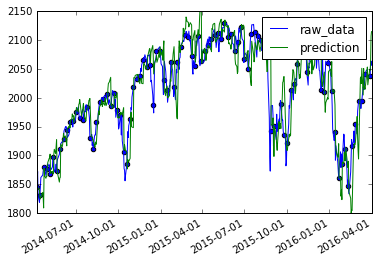

In [40]:
import time

N_in = len(input_list)
N_middle=int(0.2 * N_in)
N_out = 1
freq = 5

N_epoch = 1000
N_memory = max(2 * freq, 50)
lstm = Stacked2LSTM(N_in, N_middle, N_out)
model = Regression(lstm)
optimizer = optimizers.Adam()
optimizer.setup(model)
st = time.time()
prediction = online_train(lstm, model, optimizer, input_data, target_data, 
                             N_memory=N_memory, renew_freq=freq, N_epoch=N_epoch)  
N_pred = len(prediction)
lasped_time = time.time() - st
print ("time for prediction: %f" % lasped_time)

import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pylab import text


# データをセット
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, y)


# グラフのフォーマットの設定
days      = mdates.AutoDateLocator()  
daysFmt = mdates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_locator(days)
ax.xaxis.set_major_formatter(daysFmt)
fig.autofmt_xdate()

N_data = len(input_data)
N_freq = N_data / freq
for i in xrange(N_freq):
    ax.scatter(date[i * freq], target_data[i * freq])
ax.plot(date[-N_pred:], target_data[-N_pred:], label="raw_data", c='b')
ax.plot(date[-N_pred:], prediction, label="prediction", c='g')
plt.xlim(date[-N_pred], date[-1])
plt.ylim(1800, 2150)

# text(date[0],    1700, "symbol: %d \n" % len(input_list) +  input_str, ha = 'left', va = 'top') 

plt.legend() 

plt.savefig("S&P_1week_dot", dpi=400)

# Add more layers

In [44]:
class Stacked4LSTM(Chain):
    def __init__(self, N_in, N_middle, N_out):
        super(Stacked4LSTM, self).__init__(
            input = L.Linear(N_in, N_middle),
            mid1 = L.LSTM(N_middle, N_middle),
            mid2 = L.LSTM(N_middle, N_middle),
            mid3 = L.LSTM(N_middle, N_middle), 
            mid4 = L.LSTM(N_middle, N_middle),
            output = L.Linear(N_middle, N_out),
        )
        
    def reset_state(self):
        self.mid1.reset_state()
        self.mid2.reset_state()
        self.mid3.reset_state()
        self.mid4.reset_state()
    
    def __call__(self, x):
        h1 = F.relu(self.input(x))
        h2 = F.relu(self.mid1(h1))
        h3 = F.relu(self.mid2(h2))
        h4 = F.relu(self.mid3(h3))
        h5 = F.relu(self.mid4(h4))
        y = self.output(h5)
        return y
    
class Regression(Chain):
    def __init__(self, predictor):
        super(Regression, self).__init__(predictor=predictor)
        
    def __call__(self, x, y):
        output = self.predictor(x)
        self.loss = F.mean_squared_error(output, y)
        return self.loss

predict for  [50, 60]
predict for  [100, 110]
predict for  [150, 160]
predict for  [200, 210]
predict for  [250, 260]
predict for  [300, 310]
predict for  [350, 360]
predict for  [400, 410]
predict for  [450, 460]
predict for  [500, 504]
time for prediction: 3121.925308


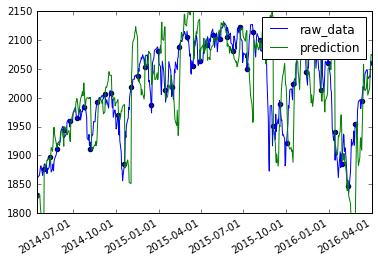

In [46]:
import time

N_in = len(input_list)
N_middle=int(0.2 * N_in)
N_out = 1
freq = 10

N_epoch = 5000
N_memory = max(2 * freq, 50)
lstm = Stacked4LSTM(N_in, N_middle, N_out)
model = Regression(lstm)
optimizer = optimizers.Adam()
optimizer.setup(model)
st = time.time()
prediction = online_train(lstm, model, optimizer, input_data, target_data, 
                             N_memory=N_memory, renew_freq=freq, N_epoch=N_epoch)  
N_pred = len(prediction)
lasped_time = time.time() - st
print ("time for prediction: %f" % lasped_time)

import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pylab import text


# データをセット
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, y)


# グラフのフォーマットの設定
days      = mdates.AutoDateLocator()  
daysFmt = mdates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_locator(days)
ax.xaxis.set_major_formatter(daysFmt)
fig.autofmt_xdate()

N_data = len(input_data)
N_freq = N_data / freq
for i in xrange(N_freq):
    ax.scatter(date[i * freq], target_data[i * freq])
ax.plot(date[-N_pred:], target_data[-N_pred:], label="raw_data", c='b')
ax.plot(date[-N_pred:], prediction, label="prediction", c='g')
plt.xlim(date[-N_pred], date[-1])
plt.ylim(1800, 2150)

# text(date[0],    1700, "symbol: %d \n" % len(input_list) +  input_str, ha = 'left', va = 'top') 

plt.legend() 

plt.savefig("S&P_2week_dot", dpi=400)